In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
from pandas_datareader import data as wb
from datetime import datetime, timedelta
import json
import requests
import random
import os

In [4]:
csv_path = Path('monthly_data.csv')
monthly_df = pd.read_csv(csv_path, index_col = "Date")
monthly_df

,DXC,BBY,AMG,CNP,WMT,MRK,NEM,VFC,MDT,HST,...,UNH,HSY,FB,EIX,SBUX,MCO,HII,RL,LNT,AXP
Date,,,,,,,,,,,,,,,,,,,,,
3/31/15,22.128880,33.179913,209.090057,16.580273,73.015411,49.780846,20.141970,62.421577,70.460373,16.215014,...,109.714111,89.785667,82.220001,53.208439,43.336098,97.564026,131.290314,118.733910,26.846176,72.461044
4/30/15,21.847523,30.422970,220.139389,17.035191,69.286972,51.582237,24.576731,60.034454,67.262138,16.182875,...,103.323639,81.786682,78.769997,51.905262,45.377064,101.060547,123.271454,120.458458,25.997549,71.839569
5/31/15,21.847523,30.422970,220.139389,17.035191,69.286972,51.582237,24.576731,60.034454,67.262138,16.182875,...,103.323639,81.786682,78.769997,51.905262,45.377064,101.060547,123.271454,120.458458,25.997549,71.839569
6/30/15,22.407070,28.825178,212.808884,15.652534,63.363731,49.679543,21.693781,58.084694,67.285637,16.092331,...,113.634422,79.484596,85.769997,47.695503,49.230713,101.788795,105.818543,119.940102,24.815250,72.359734
7/31/15,22.335381,28.542316,202.392349,15.907512,64.301750,51.451008,15.945307,64.206329,71.181107,15.727145,...,113.075554,83.117447,94.010002,51.497070,53.187904,104.117599,110.348679,114.077202,26.687109,70.814239
8/31/15,21.161091,32.475834,181.500885,15.513625,58.219959,46.991810,15.852435,60.325130,65.642090,14.388148,...,107.766403,80.615135,89.430000,50.184113,50.369987,96.757385,106.214287,100.756577,24.587204,71.428711
9/30/15,21.115461,33.015205,166.460159,15.030388,58.318901,43.470867,14.947566,57.081448,61.115185,12.989917,...,108.522560,82.740372,89.900002,54.487957,52.331020,92.870461,101.091324,107.559921,25.376841,69.017326
10/31/15,21.115461,33.015205,166.460159,15.030388,58.318901,43.470867,14.947566,57.081448,61.115185,12.989917,...,108.522560,82.740372,89.900002,54.487957,52.331020,92.870461,101.091324,107.559921,25.376841,69.017326
11/30/15,25.582476,28.265713,172.534851,14.324827,52.922333,46.657028,17.124123,54.144100,68.784248,13.639001,...,105.435532,78.263832,104.239998,51.282780,56.703079,97.852180,123.981049,113.067169,26.354477,66.951530


In [7]:
monthly_returns = monthly_df.pct_change()

In [13]:
sharpe_ratio = (monthly_df.mean()) / (monthly_df.std() * np.sqrt(12))
sharpe_ratio

DXC    0.675362
BBY    0.828584
AMG    1.104839
CNP    1.375772
WMT    1.262941
         ...   
MCO    0.934332
HII    1.162941
RL     1.688381
LNT    1.381842
AXP    1.209096
Length: 100, dtype: float64

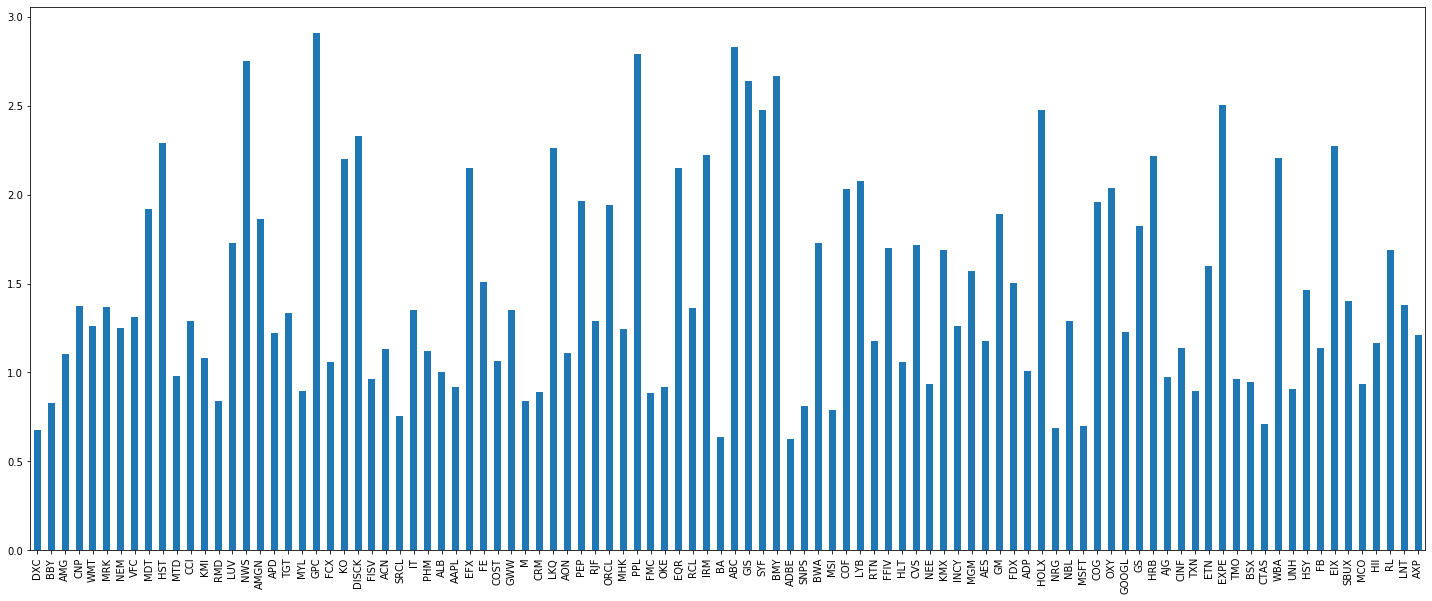

In [9]:
sharpe_ratio.plot(kind='bar', figsize=(25,10))